In [1]:
# Import required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder,OneHotEncoder


In [2]:
LE = LabelEncoder()
OE= OneHotEncoder()
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set_theme(style="whitegrid")

data_train=pd.read_csv('./dataset/titanic_train.csv')
data_test=pd.read_csv('./dataset/titanic_test.csv')
data = pd.concat([data_train, data_test], axis=0)

Lets take a look at the data

In [3]:
data.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [4]:
data.shape

(1309, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [6]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


EDA: lets use a heatmap to visualize the missing values

In [7]:
data.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

From the info we come to know that the Age column has some null values, Embarked has a couple of null values and Cabin has a lot of null values. this can also be visualized.

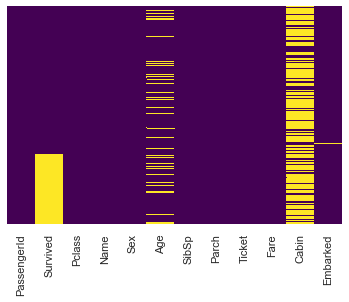

In [8]:
sns.heatmap(data.isnull(), yticklabels=False,\
            cbar=False,cmap='viridis')
plt.show()

In [9]:
pd.crosstab(data.Pclass,data.Survived,margins=True)

Survived,0.0,1.0,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [10]:
pd.crosstab([data.Sex,data.Survived],data.Pclass,margins=True)

Pclass             1    2    3  All
Sex    Survived                    
female 0.0         3    6   72   81
       1.0        91   70   72  233
male   0.0        77   91  300  468
       1.0        45   17   47  109
All              216  184  491  891

Now lets do some analysis of the columns with respect to the variables we have. lets see the survival count, count based on sex and count based on passenger class

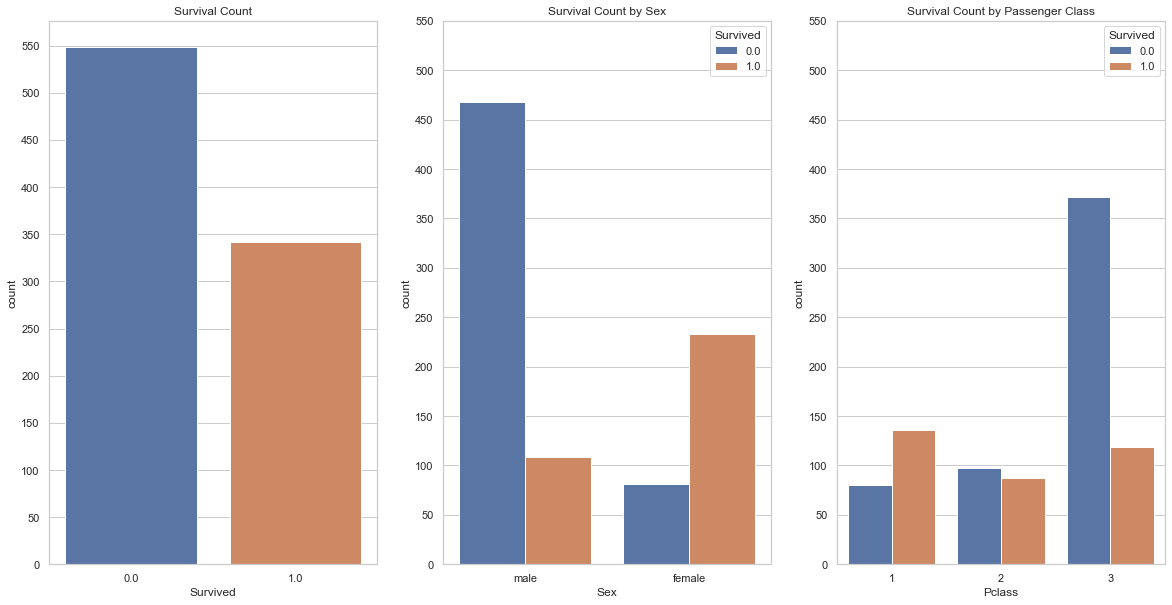

In [11]:

fig,ax=plt.subplots(1,3,figsize=(20,10))
sns.countplot('Survived',data=data,ax=ax[0])
ax[0].set_title('Survival Count')
sns.countplot(x='Sex',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Survival Count by Sex')
sns.countplot(x='Pclass',hue='Survived',data=data,ax=ax[2])
ax[2].set_title('Survival Count by Passenger Class')
ax[0].set_yticks(range(0,600,50))
ax[1].set_yticks(range(0,600,50))
ax[2].set_yticks(range(0,600,50))
plt.show()

Here we see that very few people have survived, and that women were the ones who were given preference while evacuation. We also see that as per the class the people from class one had a higher rate of survival as compared to the people in class 3. We could make these inferences based on the graphical representation of data or graphical analysis.

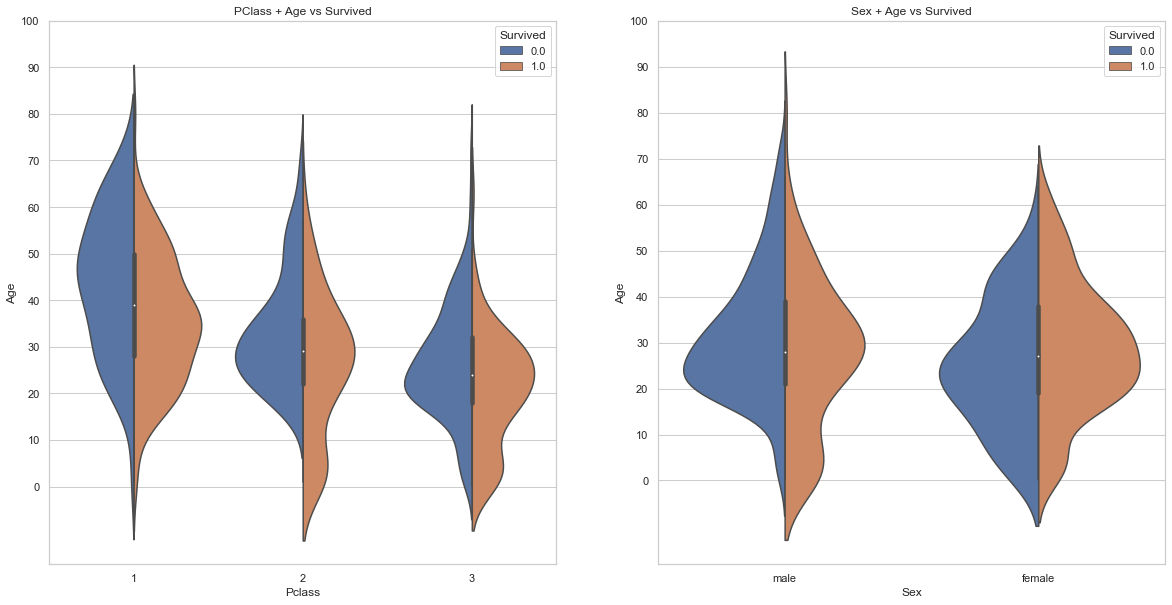

In [12]:
fig,ax=plt.subplots(1,2,figsize=(20,10))
sns.violinplot('Pclass','Age',hue='Survived',data=data,split=True,ax=ax[0])
ax[0].set_title('PClass + Age vs Survived')
sns.violinplot("Sex","Age", hue="Survived", data=data,split=True,ax=ax[1])
ax[1].set_title('Sex + Age vs Survived')
ax[0].set_yticks(range(0,110,10))
ax[1].set_yticks(range(0,110,10))
plt.show()

From these violin plots we can see that the children also had a higher rate of survival. and that too irrespective of the class. Survival of women in 20-30 years range is also better

##Feature: Age

We need to deal with the null values in the age colun but we cannot fill up all the missing values by a mean. we could engineer a feature based on the name. names have salutations and we can classify them 

In [13]:
data['Salut']=0
for i in data:
    data['Salut']=data.Name.str.extract('([A-Za-z]+)\.')

In [14]:
pd.crosstab(data.Salut,data.Sex).T

Salut,Capt,Col,Countess,Don,Dona,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,1,0,1,0,0,260,2,1,0,197,2,0,0
male,1,4,0,1,0,7,1,0,2,61,0,0,0,757,0,0,8,1


In [15]:
# find the mean age for each Saultation
age_mean=data.groupby('Salut')['Age'].mean()
age_mean

Salut
Capt        70.000000
Col         54.000000
Countess    33.000000
Don         40.000000
Dona        39.000000
Dr          43.571429
Jonkheer    38.000000
Lady        48.000000
Major       48.500000
Master       5.482642
Miss        21.774238
Mlle        24.000000
Mme         24.000000
Mr          32.252151
Mrs         36.994118
Ms          28.000000
Rev         41.250000
Sir         49.000000
Name: Age, dtype: float64

create a function impute_age(). This rec parameter basically just represents every row (record) in our data frame.

In [16]:
def impute_age(rec):
    for index, age in zip(age_mean.index, age_mean.values):
        if rec['Salut'] == index:
            return age

Now we need to replace the mising age values with the mean of salutations. So, we use lambda function to apply 

In [17]:
data['Age'] = data.apply(lambda x: impute_age(x) if np.isnan(x['Age']) else x['Age'], axis=1)

Feature: SibSp and Parch

Sib Sp tells us whether Siblings or Spouse are present and Parch tells us if parents and children are present

In [18]:
pd.crosstab([data.SibSp],data.Survived)

Survived,0.0,1.0
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


In [19]:
pd.crosstab([data.SibSp,data.Pclass],data.Survived)

Survived      0.0  1.0
SibSp Pclass          
0     1        60   77
      2        70   50
      3       268   83
1     1        18   53
      2        23   32
      3        56   27
2     1         1    4
      2         4    4
      3        10    5
3     1         1    2
      2         0    1
      3        11    1
4     3        15    3
5     3         5    0
8     3         7    0

This is showing us that the chances of survival for a single person is less. Also we see here that the larger families with 5-8 people have died. This is the case specifically since they were from Class 3!!. So, the larger families (SibSp>3) in Class 3 had almost no chance of survival. What about Parch??

In [20]:
pd.crosstab([data.Parch],data.Survived)

Survived,0.0,1.0
Parch,,
0,445,233
1,53,65
2,40,40
3,2,3
4,4,0
5,4,1
6,1,0


In [21]:
pd.crosstab([data.Parch,data.Pclass],data.Survived)

Survived      0.0  1.0
Parch Pclass          
0     1        64   99
      2        86   48
      3       295   86
1     1        10   21
      2         8   24
      3        35   20
2     1         5   16
      2         3   13
      3        32   11
3     2         0    2
      3         2    1
4     1         1    0
      3         3    0
5     3         4    1
6     3         1    0

Here again we see that the Class 3 survival rate is low for families. So we can group the Family size in ['Alone','Small','Medium','Large']

In [22]:
data['Family']=data['SibSp']+data['Parch']+1
family_map = {1: 'Alone', 2: 'Small', 3: 'Small', 4: 'Small', 5: 'Medium', 6: 'Medium', 7: 'Large', 8: 'Large', 11: 'Large'}
data['Family'] = data['Family'].map(family_map)

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Salut,Family
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Small
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Small
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Alone
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Small
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Alone


Now lets visualize this data

<AxesSubplot:>

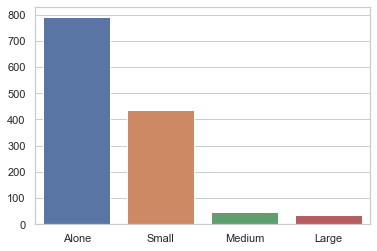

In [23]:
sns.barplot(x=data['Family'].value_counts().index,y=data['Family'].value_counts().values)

<AxesSubplot:xlabel='Family', ylabel='count'>

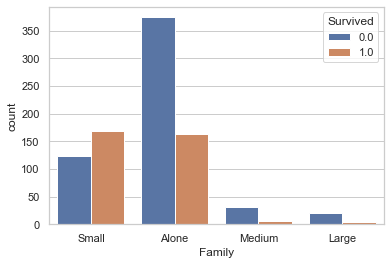

In [24]:
sns.countplot(x='Family',hue='Survived',data=data)

Lets find the missing values of Embarked column

In [25]:
c1=['S','C','Q']
data[~data.Embarked.isin(['S','C','Q'])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Salut,Family
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,Miss,Alone
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,Mrs,Alone


In [26]:
data['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [27]:
pd.crosstab([data.Sex,data.Embarked],data.Pclass,margins=True)

Pclass             1    2    3   All
Sex    Embarked                     
female C          71   11   31   113
       Q           2    2   56    60
       S          69   93  129   291
male   C          70   17   70   157
       Q           1    5   57    63
       S         108  149  366   623
All              321  277  709  1307

here we see maximum females travelling to S have survived! so we can fill the above missing Embarked values with 'S'

In [28]:
data['Embarked'].fillna('S',inplace=True)

##Cabin

Lets fill up the values in Cabin with U for Unknown and we can extract and keep only the first letter for the rest

In [29]:
data['Cabin'] = data['Cabin'].fillna('U')

In [30]:
data['Cabin'] = data['Cabin'].apply(lambda x: x[0])

In [31]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Salut,Family
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U,S,Mr,Small
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,Mrs,Small
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U,S,Miss,Alone
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,Mrs,Small
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U,S,Mr,Alone


In [32]:
data.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin            0
Embarked         0
Salut            0
Family           0
dtype: int64

<AxesSubplot:>

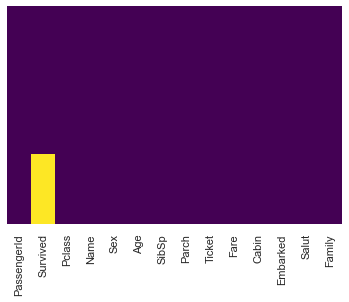

In [33]:
sns.heatmap(data.isnull(), yticklabels=False,\
            cbar=False,cmap='viridis')

In [34]:
data.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Salut           object
Family          object
dtype: object

In [35]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Sex'] = LE.fit_transform(data['Sex'])

In [36]:
data_Embarked = pd.get_dummies(data.Embarked, drop_first=True,prefix='Embarked')
data_Pclass = pd.get_dummies(data.Pclass, drop_first=True,prefix='Pclass')
data_Cabin = pd.get_dummies(data.Cabin, drop_first=True,prefix='Cabin')
data_Family = pd.get_dummies(data.Family, drop_first=True,prefix='Family')
data = pd.concat([data, data_Embarked,data_Pclass,data_Cabin,data_Family], axis=1)

In [37]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Family_Large,Family_Medium,Family_Small
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,...,0,0,0,0,0,0,1,0,0,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,...,1,0,0,0,0,0,0,0,0,1
2,3,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,...,0,0,0,0,0,0,1,0,0,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,...,1,0,0,0,0,0,0,0,0,1
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,...,0,0,0,0,0,0,1,0,0,0


In [38]:
df=data.drop(['PassengerId','Name','SibSp','Parch','Ticket','Fare',\
              'Cabin','Embarked','Salut','Pclass','Family'],axis='columns')

Now we are ready to model and predict